

## **COMP6685 Deep Learning Coursework A1**


Individual (50% of total mark)


**TASK:**	You are required to develop a phyton code with appropriate comments and answer questions.

**Description**: Create a code using this temlate to train a Convolutional Neural Network (CNN) on the fashion MNIST dataset available at https://keras.io/api/datasets/fashion_mnist/ . 

Fashion MNIST is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

The dataset should be imported in the code and one sample image should be visualised before applying the model.

Define a CNN and comment the chosen parameters of the network. Apply a regularization method (L1, L2 or L1L2). Divide the dataset into training, validation and test set. Obtain the accuracy on the validation set and plot the final results using the data from the test set. Comment your lines of code appropriately to explain your solution.

Enhance the model's performance to obtain the best or optimal validation accuracy. Further questions about final remarks on the results will be answered on the markdown defined in the template.

---
---

Note: This is only a template. You can add more code/text cells if necessary.

In [3]:
## import data from at 
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [5]:
labels = [
    {0, "T-shirt/top"}, 
    {1, "Trouser"}, 
    {2, "Pullover"},
    {3,"Dress"},
    {4, "Coat"},
    {5, "Sandal"},
    {6, "Shirt"},
    {7, "Sneaker"},
    {8, "Bag"},
    {9, "Ankle boot"}
]

N_EPOCHS = 20  # Use 20 for better results
BATCH_SIZE = 128
VERBOSE = 2
OPTIMIZER = keras.optimizers.legacy.Adam()
VALIDATION_SPLIT = 0.2
FOLDS = 5
IMG_ROWS, IMG_COLS = 28, 28  # Input dimensions of each MNIST image
N_CLASSES = 10  # Number of outputs = number of digits
INPUT_SHAPE = (28, 28, 1)  # Adjusted for Keras default


# PDF paper https://bhu.ac.in/research_pub/jsr/Volumes/JSR_64_02_2020/51.pdf

Import the dataset and divide it appropriately into sets for cross-validation. **(10 marks)**

---

In [8]:
# Load and prepare the dataset
(fashion_train_images, fashion_train_labels), (fashion_test_images, fashion_test_labels) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
fashion_train_images, fashion_test_images = fashion_train_images / 255.0, fashion_test_images / 255.0

# Reshape images to fit the model input requirement
fashion_train_images = fashion_train_images.reshape((fashion_train_images.shape[0], IMG_ROWS, IMG_COLS, 1))
fashion_test_images = fashion_test_images.reshape((fashion_test_images.shape[0], IMG_ROWS, IMG_COLS, 1))

# One-hot encode the labels
fashion_train_labels = keras.utils.to_categorical(fashion_train_labels, N_CLASSES)
fashion_test_labels = keras.utils.to_categorical(fashion_test_labels, N_CLASSES)


*your answer here*

Visualise a random sample image of the dataset. **(5 marks)**

---

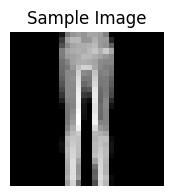

In [9]:
# Visualize one random sample from the dataset
plt.figure(figsize=(2,2))
random_index = np.random.choice(fashion_train_images.shape[0])
plt.imshow(fashion_train_images[random_index].reshape(28,28), cmap='gray')
plt.title('Sample Image')
plt.axis('off')
plt.show()


Define your CNN model. Specify the network and training parameters and comment them. **(10 marks)**

---

In [11]:
def create_model(optimizer='adam', kernel_regularizer=keras.regularizers.l2(0.001)):
    model = keras.Sequential([
        # Convolutional layer with L2 regularization
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        # Another convolutional layer
        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        # Flatten the output of the conv layers to feed into the dense layer
        layers.Flatten(),
        
        # Dense layer with L2 regularization
        layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        
        # Output layer with softmax for multi-class classification
        layers.Dense(10, activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# your code here



Train the CNN model using k-fold cross-validation. **(10 marks)**

---

In [16]:
# your code here
# Prepare k-fold cross-validation
FOLDS = 5
EPOCHS = 10
VERBOSE = 2
OPTIMIZER = keras.optimizers.legacy.Adam()

kfold = KFold(n_splits=FOLDS, shuffle=True)

fold_num = 1
acc_per_fold = []
loss_per_fold = []

for train, test in kfold.split(fashion_train_images, fashion_train_labels):
    # Create model
    model = create_model()
    
    # Fit model
    history = model.fit(fashion_train_images[train], fashion_train_labels[train], 
                        EPOCHS, 
                        validation_data=(fashion_train_images[test], fashion_train_labels[test]), 
                        verbose=2)
    
    # Generate generalization metrics
    scores = model.evaluate(fashion_train_images[test], fashion_train_labels[test], verbose=0)
    print(f'Score for fold {fold_num}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    fold_num += 1


Epoch 1/10
1500/1500 - 11s - loss: 0.6457 - accuracy: 0.8183 - val_loss: 0.5291 - val_accuracy: 0.8516 - 11s/epoch - 7ms/step
Epoch 2/10
1500/1500 - 11s - loss: 0.4777 - accuracy: 0.8648 - val_loss: 0.4546 - val_accuracy: 0.8740 - 11s/epoch - 7ms/step
Epoch 3/10
1500/1500 - 11s - loss: 0.4424 - accuracy: 0.8767 - val_loss: 0.4514 - val_accuracy: 0.8699 - 11s/epoch - 7ms/step
Epoch 4/10
1500/1500 - 11s - loss: 0.4166 - accuracy: 0.8853 - val_loss: 0.4211 - val_accuracy: 0.8827 - 11s/epoch - 7ms/step
Epoch 5/10
1500/1500 - 10s - loss: 0.4029 - accuracy: 0.8887 - val_loss: 0.4097 - val_accuracy: 0.8864 - 10s/epoch - 7ms/step
Epoch 6/10
1500/1500 - 10s - loss: 0.3897 - accuracy: 0.8929 - val_loss: 0.3933 - val_accuracy: 0.8923 - 10s/epoch - 7ms/step
Epoch 7/10
1500/1500 - 10s - loss: 0.3790 - accuracy: 0.8959 - val_loss: 0.3937 - val_accuracy: 0.8906 - 10s/epoch - 7ms/step
Epoch 8/10
1500/1500 - 11s - loss: 0.3712 - accuracy: 0.8986 - val_loss: 0.3829 - val_accuracy: 0.8910 - 11s/epoch - 7

Evaluate your model in cross-validation. Calculate and print the loss and accuracy scores in each fold. Print the average cross-validation accuracy and loss your network achieved (in all folds). **(15 marks)**


In [18]:
# your code here
# Print the average scores
print('----------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('----------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('----------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('----------------------------------------------------------------')


----------------------------------------------------------------
Score per fold
----------------------------------------------------------------
> Fold 1 - Loss: 0.3664822280406952 - Accuracy: 89.92499709129333%
----------------------------------------------------------------
> Fold 2 - Loss: 0.3624473512172699 - Accuracy: 90.03333449363708%
----------------------------------------------------------------
> Fold 3 - Loss: 0.35979124903678894 - Accuracy: 90.10000228881836%
----------------------------------------------------------------
> Fold 4 - Loss: 0.3687325716018677 - Accuracy: 90.20000100135803%
----------------------------------------------------------------
> Fold 5 - Loss: 0.37502697110176086 - Accuracy: 89.68333601951599%
----------------------------------------------------------------
Average scores for all folds:
> Accuracy: 89.98833417892456 (+- 0.17682369904669634)
> Loss: 0.3664960741996765
----------------------------------------------------------------


*your answer here*

Plot the final results (accuracy/loss) on the test set in each fold. **(10 marks)**

---

NameError: name 'acc_per_fold' is not defined

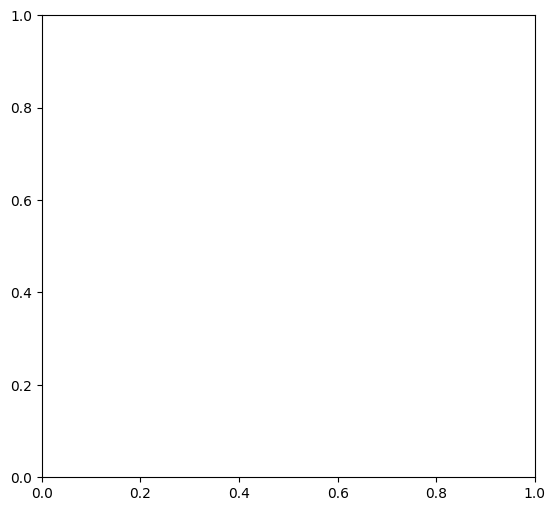

In [12]:
# your code here
num_folds = FOLDS
plt.figure(figsize=(14, 6))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, num_folds+1), acc_per_fold, marker='o', linestyle='-', color='blue')
plt.title('Model accuracy on Test Set')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(range(1, num_folds+1))
plt.grid(True)

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(range(1, num_folds+1), loss_per_fold, marker='o', linestyle='-', color='red')
plt.title('Model loss on Test Set')
plt.xlabel('Fold Number')
plt.ylabel('Loss')
plt.xticks(range(1, num_folds+1))
plt.grid(True)

plt.tight_layout()
plt.show()
 

Additional questions:


*   Describe whether you found any differences in the network’s accuracy when applying regularisation compared to not applying it. If there were differences, which regularisation did you use? If no differences were found, what could be the reason? **(10 marks)**

*your answer here*

*   Write your conclusions about the results achieved with your model on the fashion MNIST dataset and ideas to improve these results/performance further. **(10 marks)**

*your answer here*

---



Additional remarks:

*   Code outline appropriately commented. **(10 marks)**
*   Code running without errors. **(10 marks)**

---

